# OBSERVAÇÃO

O presente notebook visa servir como uma breve introdução ao Pytorch Geometric, módulo por meio do qual é possível desenvolver modelos de deep learning geométrico. Não é necessário ter conhecimentos prévios em deep learning, pois todos os conceitos específicos serão explicados. Vale ressaltar que o código, bem como o conteúdo, deste notebook foi fortemente inspirado pela <a href='https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html'>documentação</a> da biblioteca. Todo crédito aos desenvolvedores:

FEY, Matthias; LENSSEN, Jan Eric. Fast graph representation learning with PyTorch Geometric. arXiv preprint arXiv:1903.02428, 2019.

# 0- Instalação

## 0.1- Gradient notebook

No <a href='https://gradient.run/notebooks'>  gradient </a>, inicialize um novo notebook a partir do container do Pytorch. Em seguida, desinstale a versão atual do Pytorch pelo seguinte código:

In [1]:
'''
!pip3 uninstall torchtext -y
!pip3 uninstall torchvision -y
!pip3 uninstall torch -y
'''

'\n!pip3 uninstall torchtext -y\n!pip3 uninstall torchvision -y\n!pip3 uninstall torch -y\n'

A partir disso, instale a versão 1.9.0:

In [2]:
#!pip3 install torch==1.9.0

Com isso, baixe os pacotes do Pytorch Geometric:

In [3]:
'''
import torch

if torch.__version__ != '1.9.0+cu102':
    print('Versão do pytorch inadequada! Favor instalar a versão 1.9.0.')
else:    
    pytorch_version=f'torch-{torch.__version__}.html'
    !pip3 install --no-index torch-scatter -f https://pytorch-geometric.com/whl/$pytorch_version
    !pip3 install --no-index torch-sparse -f https://pytorch-geometric.com/whl/$pytorch_version
    !pip3 install --no-index torch-cluster -f https://pytorch-geometric.com/whl/$pytorch_version
    !pip3 install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/$pytorch_version
    !pip3 install torch-geometric
'''

"\nimport torch\n\nif torch.__version__ != '1.9.0+cu102':\n    print('Versão do pytorch inadequada! Favor instalar a versão 1.9.0.')\nelse:    \n    pytorch_version=f'torch-{torch.__version__}.html'\n    !pip3 install --no-index torch-scatter -f https://pytorch-geometric.com/whl/$pytorch_version\n    !pip3 install --no-index torch-sparse -f https://pytorch-geometric.com/whl/$pytorch_version\n    !pip3 install --no-index torch-cluster -f https://pytorch-geometric.com/whl/$pytorch_version\n    !pip3 install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/$pytorch_version\n    !pip3 install torch-geometric\n"

## 0.2- Instalação local

É fortemente recomendado criar um novo ambiente virtual. 

Instale o Pytorch:

In [4]:
#!conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch -y

Instale o Pytorch Geometric:

In [5]:
#!conda install pyg -c pyg -c conda-forge

A partir desse momento, iremos denominar o Pytorch Geotric como PyG.

# 1- Representação de um grafo

Como introdução ao PyG, vamos construir o grafo definido pela equação abaixo:

$$ G = \{ V, E \} $$

Em que:

$$ V = \{ \{0, 1, 2 \} \} $$
$$ E = \{ \{0, 1\}, \{1, 2\} \} $$

Note que o grafo G é composto por três vértices {0,1,2} e por duas arestas {{0,1},{1,2}}, sendo não dirigido.

No PyG, um grafo é representado como uma instância da classe <code>torch_geometric.data.Data</code>. Portanto, devemos importá-la de modo a construir o grafo. Além disso, importaremos também o módulo <code>torch</code> com a finalidade de utilizar algumas funcionalidades do Pytorch, como os tensores.

In [6]:
import torch
from torch_geometric.data import Data

## 1.1- Representando as arestas

A classe <code>Data</code> espera receber a representação das arestas no formato <code>COO</code> (COOrdinate). Nele, a conectividade do grafo é representada por meio de uma matriz com duas linhas, a primeira se referindo aos vértices de origem; a segunda, aos de destino. Dessa forma, os dois vértices em uma mesma coluna compõem a aresta em questão.

Usualmente,tal matriz é referida como <code>edge_index</code>, sendo implementada por um tensor do tipo <code>torch.long</code>:

In [7]:
l = [[0, 1, 1, 2], 
     [1, 0, 2, 1]]

edge_index = torch.tensor(l, dtype=torch.long)
edge_index

tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])

Perceba que, na primeria coluna, encontram-se os vértices 0 e 1 respectivamente, representando uma aresta que parte de 0 em direção a 1. Já na segunda coluna, novamente encontramos os vértices 0 e 1, porém na ordem inversa, indicando que agora a aresta parte de 1 em direção a 0. 


Tal notação, embora pareça redundante, é necessária para sinalizar que o grafo é não dirigido. O mesmo padrão se repete para as duas últimas colunas, as quais representam a aresta {1,2}.

Outra forma de definir as arestas seria por meio de uma lista de tuplas. Porém, de modo a manter o formato COO, precisamos realizar a transposição do tensor, por meio do método <code>t</code>, além de aplicar o método <code>contiguous</code> em seguida.

In [8]:
edge_index = torch.tensor([[0,1],
                           [1,0],
                           [1,2],
                           [2,1]], dtype=torch.long)

edge_index = edge_index.t().contiguous()
edge_index

tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])

## 1.2 - Representando as _features_

Para esse exemplo, cada nó terá apenas uma _feature_. Dessa forma, podemos definir o tensor como uma matriz coluna, em que cada linha representa as _features_ dos nós 0, 1 e 2 respectivamente. 

Como as _features_ são as variáveis independentes do modelo, iremos referenciar tal tensor como <code>x</code>, além de atribuir o tipo de dado <code>torch.float</code>.

In [9]:
l = [[-1], 
     [0], 
     [1]]

x = torch.tensor(l, dtype=torch.float)
x

tensor([[-1.],
        [ 0.],
        [ 1.]])

## 1.3 - Criando a representação do grafo

Por fim, de modo a representar o grafo G, precisamos apenas criar uma instância da classe <code>Data</code>, passando os tensores como argumentos do construtor.

In [10]:
data = Data(x=x, edge_index=edge_index)
data

Data(x=[3, 1], edge_index=[2, 4])

Dessa forma, criamos a representação do grafo G (indicado pela imagem abaixo) no PyG. 

<figure>
<img src="img/01-graph.svg" alt="Grafo" width='400'>
    <figcaption>
        <em>Fonte: 
            <a href='https://pytorch-geometric.readthedocs.io/en/latest/'>Documentação do Pytorch Geometric</a>
        </em>
    </figcaption>
</figure>



## 1.4 - Atributos e métodos

A classe <code>Data</code> contem diversos parâmetros que retornam informações importantes da representação do grafo. Por exemplo, podemos visualizar a matriz que representa as arestas no formato COO:

In [11]:
data.edge_index

tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])

A fim da melhor visualização, podemos transpor essa matriz:

In [12]:
data.edge_index.t()

tensor([[0, 1],
        [1, 0],
        [1, 2],
        [2, 1]])

Podemos visualizar também a matriz de _features_ que guarda as variáveis independentes do modelo:

In [13]:
data.x

tensor([[-1.],
        [ 0.],
        [ 1.]])

Podemos saber a quantidade de nós do grafo:

In [14]:
data.num_nodes

3

Bem como o número de arestas:

In [15]:
data.num_edges

4

Além da quantidade de _features_ por nó:

In [16]:
data.num_features

1

Além disso, há métodos que retornnam outras informações gerais acerca do grafo, como se ele possui nós isolados:

In [17]:
data.has_isolated_nodes()

False

Se possui grafos conectados a si (_self loops_):

In [18]:
data.has_self_loops()

False

Por fim, se o grafo é dirigido:

In [19]:
data.is_directed()

False

# 2- Dataset Cora

Até o presente momento, apenas verificamos como o PyG representa um grafo, bem como as informações que podemos extrair dele. A partir disso, já podemos trabalhar com um exemplo real.

Para tanto, o PyG disponibiliza diversos <a href='https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html'>datasets</a>, dentre eles, o <code>Cora</code>, presente na coleção <code>Planetoid</code>, um dos mais empregados para benchmark para modelos de aprendizagem semi-supervisionada. Abaixo, há uma breve descrição do dataset:

>
>O dataset Cora é constituído por 2708 publicações de Machine Learning classificadas em 7 categorias:
> - Baseado em Caso
> - Algortimos Genéticos
> - Redes Neurais
> - Métodos Probabilísticos
> - Aprendizagem por Reforço
> - Regra de Aprendizagem
> - Teoria
>
>Os artigos foram selecionados de sorte que todos citam ou são citados por ao menos outro artigo. No total, há 5429 links de citação.
>
>Com base na frequência de palavras relevantes dos documentos, foi criado um vocabulário com 1433 palavras únicas. Cada publicação é descrita por um vetor binário que corresponde a presença ou ausência de determinada palavra do vocabulário.
>
>_Fonte: https://linqs.soe.ucsc.edu/data_

A partir da descrição acima, podemos inferir algumas características do grafo que representa o dataset <code>Cora</code>. Nesse contexto, as publicações são referentes aos nós; as citações, às arestas. Além disso, o vetor binário indicando a presença ou ausência de palavras do vocabulário na publicação representa o vetor de _features_ de cada nó. 

Dessa forma, teríamos um grafo com 2708 nós (publicações), 5429 arestas (links de citação) e 1433 _features_ para cada nó. Podemos ter uma breve ideia da forma desse grafo com base na imagem abaixo. Cada cor represente uma entre as 7 classes possíveis para os nós:

<figure>
<img src="img/02-cora.jpg" alt="Cora" width='450'>
    <figcaption>
        <em>Fonte: 
            <a href='https://paperswithcode.com/dataset/cora'>PapersWithCode</a>
        </em>
    </figcaption>
</figure>


## 2.1- Importando o dataset

Para ter acesso a qualquer dataset disponibilizado pelo PyG, deve-se importar a classe referente à coleção do dataset a partir de <code>torch_geometric.datasets</code>. Nesse caso, o Cora está presente na coleção <code>Planetoid</code>. 

In [20]:
from torch_geometric.datasets import Planetoid

Agora, devemos especificar o diretório de destino (<code>root</code>), bem como o nome (<code>name</code>) do dataset. Então, o PyG irá realizar o download dos arquivos brutos (_raw_) do dataset, convertendo posteriormente para o formato <code>Data</code> já discutido, caso isso não tenha sido realizado anteriormente.

In [21]:
dataset = Planetoid(root='.', name='Cora')

No exemplo acima, o destino final do dataset é o mesmo diretório deste notebook <code>'.'</code>. Então, é possível visualizar a criação da pasta Cora. Dentro dela, há duas pastas: _raw_ e _processed_. Na primeira, constam os arquivos originais do dataset; na segundo, os empregados pelo PyG para representar o dataset como um grafo no formato <code>Data</code> originados a partir do processamentos dos primeiros.

## 2.2- Visualizando o dataset

Uma vez inicializado, podemos visualizar algumas informações do dataset. Por exemplo, seu tamanho, isto é, a quantidade de grafos que possui:

In [22]:
len(dataset)

1

No total, há apenas um grande grafo que representa todo o dataset. Além disso, podemos verificar a quantidade de classes dos nós:

In [23]:
dataset.num_classes

7

Conforme exposto pela descrição, há de fato 7 classes. Podemos também verificar o número de _features_ dos nós:

In [24]:
dataset.num_node_features

1433

Dessa forma, é possível constatar que há 1433 _features_ por nó realmente.

Agora, vamos referenciar o grafo do dataset. Nesse caso, como mencionado, há apenas um grande grafo. Porém, há datasets que contêm diversos grafos, especialmente aqueles destinados para tarefas de classificação em nível de grafo.

In [25]:
data = dataset[0]
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

A partir disso, podemos verificar se o grafo retornado realmente é uma instância da classe <code>Data</code> conforme mencionado.

In [26]:
from torch_geometric.data import Data

text = 'O grafo é instâncida de Data' if isinstance(data, Data) else 'O grafo não é instância de Data'
print(f'>> {text}')

>> O grafo é instâncida de Data


Além disso, podemos verificar também se é um grafo dirigido ou não:

In [27]:
text = 'O grafo não é dirigido' if data.is_undirected() else 'O grafo é dirigido'
print(f'>> {text}')

>> O grafo não é dirigido


Bem como a quantidade de nós e de arestas. Lembre que as arestas são computadas duas vezes na representação de um grafo não dirigido. Portando, devemos dividir o resultado pela metade.

In [28]:
num_nodes = data.num_nodes
num_edges = data.num_edges
print(f'>> # de nós: {num_nodes}')
print(f'>> # de arestas: {num_edges//2}')

>> # de nós: 2708
>> # de arestas: 5278


Dessa forma, constatamos que há realmente 2708 nós (_publicações_), porém um pouco menos de arestas (_links de citações_) mencionadas na descrição. 

Podemos utilizar uma forma mais compacta para verificar informações de cardinalidade do grafo ao simplesmente imprimir o objeto.

In [29]:
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

Aqui, podemos visualizar alguns parâmetros que nos informam sobre a quantidade de nós, arestas e _features_:

><b>x</b>: informa as dimensões da matriz de _features_ [2708 linhas (nós), 1433 colunas (_features_)].


In [30]:
data.x.shape

torch.Size([2708, 1433])

><b>edge_index</b>: informa as dimensões da matriz de conectividade do grafo no formato COO [2 linhas (partida/destino), 10556 colunas (arestas para ambas direções)].

In [31]:
data.edge_index.shape

torch.Size([2, 10556])

Além disso, novos parâmetros surgiram, trazendo novas informações:

><b>y</b>: vetor que representa as _labels_, isto é, a variável que desejamos predizer do dataset. Pode ter dimensões variadas. Para predições em nível de grafo, possui apenas uma linha. Já para predições em nível de nó, possui uma linha para cada nó no grafo. O grafo atual se encaixa nesta categoria [2780 nós]


In [32]:
data.y

tensor([3, 4, 4,  ..., 3, 3, 3])

><b>train_mask</b>: vetor booleano que especifica quais nós são reservados para o treinamento [2780 nós]


In [33]:
data.train_mask

tensor([ True,  True,  True,  ..., False, False, False])

><b>val_mask</b>: vetor booleano que especifica quais nós são reservados para a validação [2780 nós]

In [34]:
data.val_mask

tensor([False, False, False,  ..., False, False, False])

><b>test_mask</b>: vetor booleano que especifica quais nós são reservados para o teste [2780 nós]

In [35]:
data.test_mask

tensor([False, False, False,  ...,  True,  True,  True])

Dessa forma, para o dataset em questão, não precisamos nos preocupar com divisão em conjunto de treinamento, validação e teste. Isso já está estabelecido de acordo com as máscaras.

# 3- Modelo

Então, finalmente chegou o momento de criarmos nosso modelo utilizando GNNs (_Graph Neural Networks_). Porém, primeiro vamos pensar que tarefa desejamos realizar com esse modelo, isto é, qual tipo de predição desejamos fazer?

Bem, temos um dataset representado por um grafo, cujas _labels_, isto é, aquilo que desejamos predizer, se referem aos nós do grafo. Nesse caso, elas representam a categoria (dentre 7) da publicação em questão. Dessa forma, desejamos fazer predições em nível de nó, ou seja, predizer a categoria das publicações que não foram apresentadas ao modelo durante o treinamento.

## 3.1- Imports e considerações necessárias

Para iniciar o implementação do nosso modelo, precisamos importar a classe base para qualquer modelo de rede neural do Pytorch:

In [36]:
from torch.nn import Module

Além disso, iremos importar o módulo do Pytroch com diversas funcionalidades que podem ser usadas durante a implementação do modelo como, por exemplo, as funções de ativação.

In [37]:
import torch.nn.functional as F

Precisamos definir também a arquitetura que será empregada no modelo. Como exposto na <a href='https://docs.google.com/presentation/d/10DHKI-UI_10aSF2zTca5n06xkZS900iCdYVD2HyMFrc/edit?usp=sharing'> apresentação</a>, entre as arquiteturas de redes neurais disponíveis para grafos, encontra-se a GCN (_Graph Convolutional Networks_). Nesse contexto, para tal arquitetura, ainda podemos escolher entre diversas formas de implementar as camadas de convolução. Para este exemplo, empregaremos o operador de convolução <code>GCNConv</code>, porém muitos outros podem ser acessados na <a href='
https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html'> 
documentação </a> do PyG.

In [38]:
from torch_geometric.nn import GCNConv

Outro aspecto também discutido na <a href='https://docs.google.com/presentation/d/10DHKI-UI_10aSF2zTca5n06xkZS900iCdYVD2HyMFrc/edit?usp=sharing'> apresentação</a> são os vetores de _embeddings_, que representam a agregação de informações dos nós vizinhos. O tamanho de tal vetor geralmente difere da quantidade de _features_ dos nós, sendo uma decisão de hiperparâmetro. 

In [39]:
EMBEDDING_SIZE = 16

## 3.2- Implementação

Pronto, a partir disso, já é possível implementar o modelo:

In [40]:
#O modelo herda a classe Module (base para qualquer modelo de nn)
class GCN(Module):
    def __init__(self):
        #A classe herdada é inicializada
        super().__init__()
        
        #São definidas duas camadas de convolução
        
        #A primeira camada recebe os vetores de features dos nós, construindo o embedding
        self.conv1 = GCNConv(dataset.num_node_features, EMBEDDING_SIZE)
        #A segunda camada recebe o embedding, predizendo a classe como saída
        self.conv2 = GCNConv(EMBEDDING_SIZE, dataset.num_classes)

    def forward(self, data):
        #Referenciamos a matriz de features e a conectividade do grafo 
        x, edge_index = data.x, data.edge_index
        
        x = self.conv1(x, edge_index) #Repassamos esses dados para a prmeira camada
        x = F.relu(x) #Função de ativação ReLu
        x = F.dropout(x, training=self.training) #Dropout
        x = self.conv2(x, edge_index) #Embedding é repassado para a segunda camada

        return F.log_softmax(x, dim=1)#Função de ativação softmax

Vamos analisar a implementação linha a linha para entender o que está sendo feito.

Na primeira linha, definimos a classe GCN que representará nosso modelo, o qual deve herdar a classe <code>torch.nn.Module</code>, que é a classe base para qualquer modelo de rede neural.

Na classe GCN, iremos implementar dois métodos: <code>\_\_init__</code> e <code>forward</code>

### 3.4- Método \_\_init__( )

No método <code>\_\_init__</code>, iremos inicializar a classe, bem como definir a topologia da rede neural. Dessa forma: 

1. Na primeira linha do método, inicializamos a classe herdada. 

2. Na segunda linha, definimos nossa primeira camada de convolução <code>self.conv1</code>, a qual aplica o operador convolucional <code>GCNConv</code>. Nesse caso, precisamos especificar para o operador o tamanho de entrada e de saída dos dados. No primeiro caso, como os dados de entrada são os vetores de _features_, o tamanho é de <code>data.num_node_features</code>. Já no segudno, como os dados de saída são os _embeddings_, o tamanho é de <code>EMBEDDING_SIZE</code>

3. Na terceira linha, definimos nossa segunda camada de convolução <code>self.conv2</code>, a qual aplica o operador convolucional <code>GCNConv</code>. Nesse caso, precisamos especificar novamente o tamanho de entrada e de saída dos dados para o operador. No primeiro caso, como os dados de entrada são os vetores de _embedding_, o tamanho é de <code>EMBEDDING_SIZE</code>. Já no segudno, como os dados de saída são as classes dos artigos, o tamanho é de <code>data.num_classes</code>

A fim de melhor visualizar o procedimento adotado, imagine que parte do grafo é representado pela imagem abaixo, destacando o vetor de _featares_ do nó A.

<figure>
    <img src='img/03-imp1.png' alt='Grafo genérico'>
        <figcaption>
        <em>
            Fonte: Do autor        
        </em>
    </figcaption>   
</figure>

A primeira camada de convolução será responsável por receber o vetor de _features_ do nó A. Por isso, especificamos a quantidade de _features_ no canal de entrada. Além disso, ela executará o primeiro nível de agregação, resultando no primeiro vetor de _embeddings_ para o nó A.

Em seguida, a segunda camada de convolução irá receber o vetor de _embeddings_ do nó A. Por isso, especificamos o tamanho dele para o canal de entrada. Por fim, ela irá realizar a classificação do nó entre as 7 possíveis classes definidas.

Então, a topoplogia da rede pode ser visualizada da seguinte forma:

<figure>
    <img src='img/04-imp2.png' alt='Topologia'>
        <figcaption>
        <em>
            Fonte: Do autor        
        </em>
    </figcaption>   
</figure>

### 3.5- Método forward( )

No método <code>forward</code>, definimos a regra de propagação da rede neural, ou seja, a computação realizada pelo modelo para realizar uma predição. Perceba que até o momendo só falamos na estrutura da rede. Dessa forma, vamos definir nossa lógica:

1. Na primeira linha, referenciamos a matriz de _features_ <code>x</code>, bem como a conectividade do grafo <code>edge_index</code>, repassada para o modelo por meio do atributo data.

2. Na segunda linha, repassamos esses dados para a primeira camada de convolução.

3. Na terceira linha, adicionamos uma função de ativação na saída da primeira camada. As funções de ativação são muito imporantes para um modelo, pois elas adicionam não-linearidade, o que impacta diretamente na capacidade de predição do modelo. Além disso, elas definem quais valores são repassados para as próximas camadas. Nesse caso, empregamos a unidade linear refificada (ReLu). Ela simplesmente retorna o valor do neurônio, se for positivo; 0, se for negativo. O comportamento da função pode ser visto pelo gráfico abaixo:

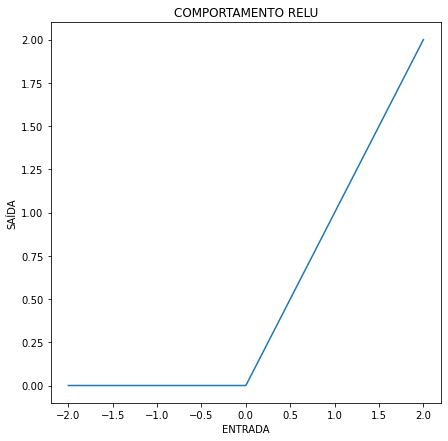

In [41]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


relu = lambda x: max(0,x)  

x = np.linspace(-2.0, 2.0, 1000)
y = np.array([relu(_) for _ in x])

fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(x,y)
ax.set(xlabel='ENTRADA',ylabel='SAÍDA', title='COMPORTAMENTO RELU')
plt.show()

O impacto da não-linearidae de um modelo pode ser ilustrada pelo gráfico de dispersão abaixo, que representa medidas fictícias da eficácia de um medicamento pela sua dosagem. A partir disso, suponha que se deseja predizer a eficácia de uma nova dosagem. Para tanto, poderíamos encontrar a curva que melhor aproxima os pontos do gráfico. Porém, teremos apenas retas com um modelo linear, o que não descreve bem os dados. Por exemplo, a reta vermelha aproxima apenas metade deles; a laranja, a outra metade. Porém, a partir de um modelo não-linear, podemos obter a curva verde, que aproxima bem todos os pontos.

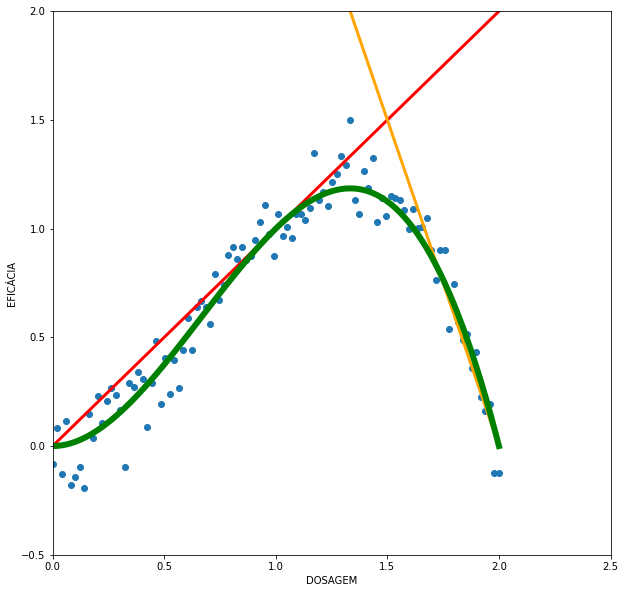

In [42]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


x = np.linspace(0, 2, 100)
noise = np.random.normal(0, .1, x.shape)
y = -x**3 + 2*x**2 + noise

y0 = x
y1 = -3*x + 6
y3 = -x**3 + 2*x**2

fig, ax = plt.subplots(figsize=(10, 10))


ax.set_xlim(0,2.5)
ax.set_ylim(-0.5, 2)

ax.scatter(x,y)
ax.plot(x,y0, linewidth=3, color='red')
ax.plot(x,y1, linewidth=3, color='orange')
ax.plot(x,y3, linewidth=6, color='green')
ax.set(xlabel='DOSAGEM', ylabel='EFICÁCIA')
plt.show()




4. Na quarta linha, aplicamos a técninca de _dropout_, um algoritmo recentemente introduzido no treinamento de redes neurais que tem demonstrado excelentes resultados. Nele, neurônios são temporariamente retirados do modelo de forma aleatória em cada interação. Assim, pode-se pensar que diversos modelos distintos são treinados, já que a topologia da rede muda a cada interação. O efeito final disso é a média dos efeitos de todas essas redes distinstas. Uma das vantagens da técninca é, por exemplo, evitar o problema de superadaptação dos dados (_overfitting_) ao generalizar o poder de inferência do modelo. Abaixo, encontra-se uma ilustração da técninca:

<figure>
    <img src='img/05-dropout.png' height='100'>
    <figcaption><em>Fonte: <a href='https://www.deeplearningbook.com.br/capitulo-23-como-funciona-o-dropout/'>DeepLearningBook</a> </em></figcaption>
</figure>

5. Na quinta linha, repassamos os resultados para a segunda camada de convolução.

6. Na sexta linha, definimos nossa última função de ativação. Geralmente, quando um modelo lida com mais de uma saída, por exemplo, categorias de publicações, é comum repassar os resultados finais para uma função que os <b>mapeia</b> para valores em um intervalo fixo. Por exemplo, imagine que tivessemos os valores de saída [1.79, -0.86, 1.3] para as categorias A, B e C. Parece uma desordem, né? Nesse contexto, entra a função _softmax_, que é responsável por mapear os valores de saída em valores no intervalo de 0 a 1. O mais interessante é que a soma dos valores mapeados pela _softmax_ resulta em 1. Dessa forma, podemos considerar tais valores como probabilidades, porém sem confiar acurácia neles. O código abaixo ilustra o cenário descrito:

In [43]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['A','B','C']
output = np.array([1.79, -0.86, 1.3])


def softmax(vetor):
    d = np.exp(vetor).sum()
    return np.array([np.exp(_)/d for _ in vetor])


print('__________________')
print('ANTES DA SOFTMAX: ')

for x, y in zip(labels, output): print(f'>> Output de {x}: {y}')

new_output = softmax(output)

print('__________________')
print('DEPOIS DA SOFTMAX: ')
for x, y in zip(labels, new_output): print(f'>> Output de {x}: {y:.2f}')

print('__________________')
print('SOMA DOS NOVOS OUTPUTS: ')
print(new_output.sum())
    

__________________
ANTES DA SOFTMAX: 
>> Output de A: 1.79
>> Output de B: -0.86
>> Output de C: 1.3
__________________
DEPOIS DA SOFTMAX: 
>> Output de A: 0.59
>> Output de B: 0.04
>> Output de C: 0.36
__________________
SOMA DOS NOVOS OUTPUTS: 
1.0


O efeito da função softmax pode ser visualizado no gráfico abaixo. Nele, é possível perceber que valores de saída altos são mapeados para altas probabilidades, enquanto os menores são penalizados.

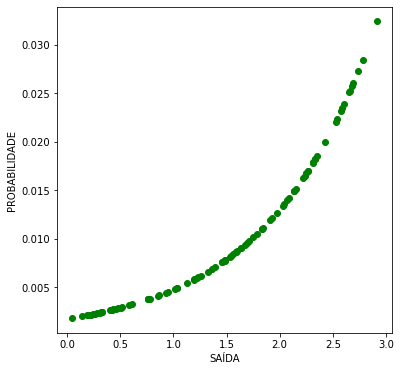

In [44]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def softmax(vetor):
    d = np.exp(vetor).sum()
    return np.array([np.exp(_)/d for _ in vetor])

x = 3*np.random.rand(100)
x0 = softmax(x)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x, x0, color='g')
ax.set(xlabel='SAÍDA', ylabel='PROBABILIDADE')
plt.show()

Por fim, a regra de propagação pode ser resumida pela figura abaixo:

<figure>
    <img src='img/06-forward.png' alt='Regra de propagação'>
    <figcaption>
        <em>
            Fonte: Do autor        
        </em>
    </figcaption>   
</figure>

# 4- Treinamento

Uma vez definido o modelo, podemos iniciar a etapa de treinamento. Incialmente, devemos especificar qual unidade de processamento (CPU ou GPU) será empregada para o treinamento. Preferencialmente, deve-se optar pela GPU. Para tanto, podemos verificar a disponibilidade dela por meio do método <code>torch.cuda.is_available</code>. Se disponível, repassamos a string 'cuda' para o método <code>torch.device</code>;  'CPU', caso contrário:

In [45]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

A partir disso, carregaremos tanto o modelo, como o dataset, no dispositivo selecionado:

In [46]:
model = GCN().to(device)
data = dataset[0].to(device)

## 4.1- Função de custo e otmizador

A tarefa que uma rede neural executa depende de seus parâmetros. Então, se quisermos melhorar as predições feitas por qualquer modelo de Deep Learning, precisamos otimizar seus parâmetros. De modo a visualizar tal procedimento, vamos considerar o modelo genérico abaixo para fins ilustrativos. Ele recebe uma imagem de 28x28 pixels, classificando-a entre os dígitos de 0 a 9:

<figure>
    <img src='img/07-rede_gen.gif' alt='Rede Genérica'>
    <figcaption><em>Fonte: <a href='https://www.youtube.com/watch?v=aircAruvnKk&t=742s'> 3Blue1Brown</a></em></figcaption>
</figure>

Inicialmente, os parâmetros de um modelo são inicializados aleatoriamente. Isso provavelmente levará a resultados iniciais muito ruins. Por exemplo, para o modelo acima, os nós de saída provavelmente exibiriam valores sem sentido (_utter trash_) ao classificar uma imagem contendo o dígito 3. Porém, como avaliar a performance do modelo de fato?

<figure>
    <img src='img/08-init.gif' alt='Inicialização' width='500'>
    <figcaption><em>Fonte: <a href='https://www.youtube.com/watch?v=aircAruvnKk&t=742s'> 3Blue1Brown</a></em></figcaption>
</figure>

Para esse caso, poderíamos calcular a distância entre os valores atuais da saída e os ideias. No exemplo acima, espera-se que a maioria dos nós possuíssem valores baixos (idealmente 0), enquanto que o nó referente ao dígito 3 tivesse o maior valor (idealmente 1). Então, podemos calcular a distância ao subtrair o que temos hoje pelo que desejaríamos ter, elevando ao quadrado de modo a obter valores positivos. Tais valores são denominados custos (_loss_).

<figure>
    <img src='img/09-loss.gif' alt='Loss'>
    <figcaption><em>Fonte: <a href='https://www.youtube.com/watch?v=aircAruvnKk&t=742s'> 3Blue1Brown</a></em></figcaption>
</figure>

A fim de avaliar o modelo como um todo, podemos então empregar uma função de custo (_loss function_). Para o exemplo acima, poderíamos utilizar a função de erro quadrático médio (MSE). A partir disso, a ideia é minimizar os valores da função de custo. Nesse momento, lembre-se que os resultados da função de custo dependem dos parâmetros do modelo, uma vez que eles definem tais resultados. Dessa forma, minimizar a função de custo implica em otimizar os parâmetros do modelo.   

Se você ainda se lembra das aulas de cálculo I, otimizar qualquer função envolve a aplicação de sua derivada. Se ainda não se deparou com esse conceito, a derivada de uma função apenas indica a taxa de variação dela em um determinado instante, bem como a tendência de crescimento e decrescimento. A partir disso, se desejamos encontrar um valor mínimo para uma função, poderíamos começar a partir de qualquer valor, caminhando pelos pontos do seu domínio até encontrar um valor de mínimo local. Para orientar a direção dessa caminhada, verificamos o sinal da derivada no ponto atual. Se for positivo, significa que a função crescerá caso nos desloquemos para a direita, o que não desejamos, logo seguimos para esquerda. O mesmo raciocínio é aplicado caso seja negativo. Por fim, a intensidade dos passos deve ser proporcional ao valor da derivada, pois ele se torna cada vez menor quanto mais se aproxima de um mínimo local.

<figure>
    <img src='img/10-min.gif' alt='Minimização' width='500'>
    <figcaption><em>Fonte: <a href='https://www.youtube.com/watch?v=aircAruvnKk&t=742s'> 3Blue1Brown</a></em></figcaption>
</figure>

O nome desse algoritmo é gradiente descendente. Gradiente pois estamos aplicando as derivadas da função para estabelecer os passos; descendente, pois seguimos na direção de um mínimo. Perceba que me refiro a um mínimo, pois o algoritmo converge para um mínimo local, não necessariamente global (o que é extremamente custoso de ser calculado). No exemplo acima, estamos calculando o gradiente descendente para uma função de uma única variável, no caso, uma função de custo que depende apenas de um parâmetro do modelo. Porém, um modelo pode ter dezenas de milhares de parâmetros. Nesse sentido, o gradiente descendente também é aplicado para espaços multidimensionais. Abaixo, verificamos a minimização de uma função de custo com dois parâmetros: 

<figure>
    <img src='img/11-minim.gif' alt='Minimização' width='600'>
    <figcaption> 
        <em>Fonte: 
            <a href='https://www.kdnuggets.com/2020/12/optimization-algorithms-neural-networks.html'>
                KDnuggets
            </a>
        </em>
    </figcaption>
</figure>

Como o gradiente descendente está minimizando a função, ele é classificado como um otimizador. Há diversos tipos de otimizadores, variando especialmente no método empregado para quantificar a intensidade do passo que se dá rumo ao mínimo. Abaixo, são apresentados alguns tipos:

<figure>
    <img src='img/12-otimizadores.gif' alt='Otimizadores' width='500'>
    <figcaption> 
        <em>Fonte: 
            <a href='https://www.kdnuggets.com/2020/12/optimization-algorithms-neural-networks.html'>
                KDnuggets
            </a>
        </em>
    </figcaption>
</figure>

Perceba que o gradiente descendente (SGD) representado por vermelho é um dos otimizadores mais lentos.

Assim como há diversos otimizadores, há também diversas funções de custo. A escolha desses hiperparâmetros depende do problema em questão, sendo muito mais empírica do que matemática. 

Para o problema em questão, empregaremos <code>torch.nn.CrossEntropyLoss</code> como função de custo; <code>torch.optim.Adam</code>, como otimizador.

In [47]:
loss_function = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4) 

A escolha dessa função de custo se deve pelo fato de lidar melhor com os resultados da função de ativação _softmax_ presente na camada de saída. Por exemplo, para probabilidades próximas de 1, a _loss_ associada é próxima de zero, já para probabilidades próximas de 0, a _loss_ associada tende ao infinito.

## 4.2- Função de treinamento

Definidas a função de custo, bem como o otimizador, podemos implementar a função que irá realizar o treinamento:

In [48]:
def train():
    optimizer.zero_grad() #Limpa o gradiente
    out = model(data) # Realiza a propagação
    loss = loss_function(out[data.train_mask], data.y[data.train_mask]) # Computa o loss apenas do conjunto de treinamento
    loss.backward()  # Calcula o gradiente 
    optimizer.step() # Atualiza os parâmetros do modelo com base no gradiente
        
    return loss

Assim como fizemos com a implementação do modelo, vamos analisar linha por linha a implementação da função de treinamento:

1. Na primeira linha, limpamos o gradiente. Nesse caso, o gradiente é o vetor que guarda os valores que irão otimizar os parâmetros.
2. Na segunda linha, o modelo realiza predições a partir do grafo.
3. Na terceira linha, com base nas predições da segunda linha, são calculados os custos (_loss_) apenas para as predições feitas a partir do conjunto de treinamento.
4. Na quarta linha, o gradiente é calculado por meio do algoritmo de _backpropagation_
5. Na quinta linha, os parâmetros do modelo são atualizados com base no gradiente calculado
6. Por fim, na sexta linha, retornamos a _loss_ do modelo

Os passos descritos acima são tomados por padrão no treinamento de qualquer modelo de rede neural. Inicialmente, são feitas predições por meio da propagação (_forward_). Em seguida, a _loss_ do modelo é calculada com base nessas predições. Então, é executado o algoritmo de retropropagação (_backward_), o qual aplica o otimizador para cada parâmetro do modelo a partir da última camada. Dessa forma, o gradiente é calculado, isto é, o vetor com os valores ótimos para ajustar os parâmetros do modelo, os quais são atualizados em seguida a fim de reduzir a _loss_ do modelo. Esse procedimento é resumido pela animação abaixo:

<figure>
    <img src='img/13-back.gif' alt='Backpropagation' width='500'>
        <figcaption> 
        <em>Fonte: 
            <a href='https://medium.com/analytics-vidhya/backpropagation-for-dummies-e069410fa585'>
                Medium
            </a>
        </em>
    </figcaption>
    
    
</figure>

## 4.3- Função de avaliação

Além disso, podemos definir uma função para avaliar o modelo durante o treinamento:

In [49]:
def aval_train():
    pred = model(data).argmax(dim=1) # Realiza predições
    correct = (pred[data.val_mask] == data.y[data.val_mask]).sum() # Soma os acertos totais
    acc = int(correct) / int(data.val_mask.sum()) # Calcula a acurácia acertos / total
    return acc


Essa função basicamente realiza:

1. Na primeira linha, realizamos a predição para todos os nós do grafo.
2. Na segunda linha, comparamos quais predições referentes aos nós do conjunto de validação estavam corretas, somando o total.
3. Na terceira linha, calculamos a acurácia, isto é, a razão entre a quantidade de predições corretas para o conjunto de validaçao pelo total de elementos desse.

Além disso, podemos definir outra função para avaliar o modelo uma vez que estiver treinado. Ela segue os mesmo procedimentos da anterior, porém emprega o conjunto de teste:

In [50]:
def aval_final():
    pred = model(data).argmax(dim=1) # Realiza predições
    correct = (pred[data.test_mask] == data.y[data.test_mask]).sum() # Soma os acertos totais
    acc = int(correct) / int(data.test_mask.sum()) # Calcula a acurácia acertos / total
    return acc


## 4.4- treinando o modelo

Vamos treinar o modelo em 200 epochs (a epoch é uma passagem completa pelo dataset).

In [51]:
num_epochs = 200 

Além disso, vamos armazenar os valores de _loss_ e de acurácia para cada epoch a fim de plotá-los em seguida.

In [52]:
accuracies = []
losses = []

Pronto, basta executar o treinamento em cada epoch:

In [53]:
epochs = np.arange(1,num_epochs+1)

for epoch in epochs:
    loss = train() #Realiza o treinamento
    accuracy = aval_train() #Calcula a acurácia
    losses.append(float(loss)) #Anexa o loss atual a lista de losses
    accuracies.append(accuracy) # Anexa a acurácia atual na lista de acuracias
    if epoch%50 == 0: print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Acurácia: {accuracy}') #Imprima o status a cada 50 epochs

Epoch: 050, Loss: 0.0465, Acurácia: 0.702
Epoch: 100, Loss: 0.0407, Acurácia: 0.708
Epoch: 150, Loss: 0.0289, Acurácia: 0.73
Epoch: 200, Loss: 0.0309, Acurácia: 0.716


Podemos plotar os valores da _loss_ e da acurácia para cada época, de modo a visualizar seu comportamento:

[Text(0.5, 0, 'EPOCH')]

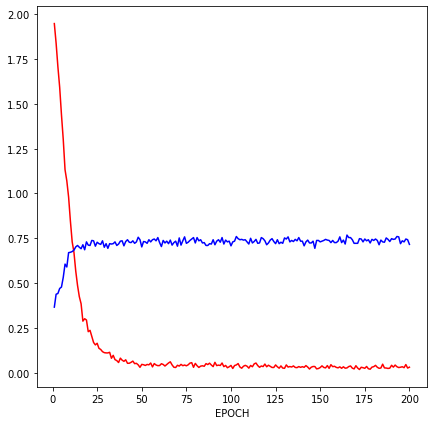

In [54]:
import matplotlib.pyplot as plt 

%matplotlib inline

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(epochs, losses, color='red')
ax.plot(epochs, accuracies, color='blue')
ax.set(xlabel='EPOCH')

Percebe-se que a acurácia converge para um valor próximo de 0.75 a partir de menos de 25 epochs. Dessa forma, apesar da queda constante da _loss_, os treinamentos seguintes não surtem efeito no aumento da acurácia.

Nesse momento, podemos fazer uma última avaliação do modelo treinado:

In [55]:
print(f'Acurácia final do modelo: {aval_final()}')

Acurácia final do modelo: 0.762


Além disso, podemos visualizar alguns resultados, por exemplo, o total de acertos para cada classe:

In [56]:
import pandas as pd

pred = pd.Series(model(data).argmax(1).cpu())
y = pd.Series(data.y.cpu())

columns = { 'PRED': pred, 'REAL': y}
df = pd.DataFrame(columns)

acertos = df[ df['PRED'] == df['REAL'] ].value_counts().sort_index(axis=0, ascending=True)
acertos.index = [0,1,2,3,4,5,6]

#total = pred.value_counts().sort_index(axis=0, ascending=True) #total de predições
real = y.value_counts().sort_index(axis=0, ascending=True)


new_columns = {'ACERTOS': acertos, 'REAL': real}
df = pd.DataFrame(new_columns)
df['%'] = (df['ACERTOS'] / df['REAL'])*100

print(df.to_string(formatters={'%':'{:.2f}'.format}))

   ACERTOS  REAL     %
0      251   351 71.51
1      188   217 86.64
2      385   418 92.11
3      574   818 70.17
4      352   426 82.63
5      224   298 75.17
6      144   180 80.00
